In [1]:
import os
import json
import csv
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
# import Collections
import gensim



Text(0, 0.5, 'bytes')

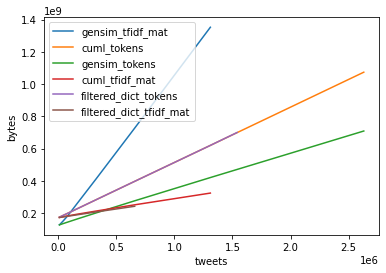

In [2]:
filenames = !ls ../results/*measure.csv

measures = {os.path.basename(name).replace('_measure.csv', ''): pd.read_csv(name) for name in filenames}

for mes in ['gensim_tfidf_mat', 'cuml_tokens', 'gensim_tokens', 'cuml_tfidf_mat', 'filtered_dict_tokens', 'filtered_dict_tfidf_mat']:
    plt.plot(measures[mes]['tweets'], measures[mes]['mem'], label=mes)
plt.legend()
plt.xlabel('tweets')
plt.ylabel('bytes')
# stemmed load == bad interned stemmed load
# stemmed vectorize == bad interned stemmed vectorized

Text(0, 0.5, 'cols in tfidf mat')

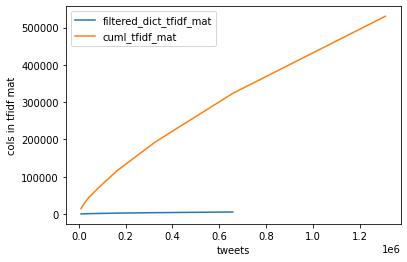

In [3]:
# to_draw = ['cuml_tfidf_mat', 'filtered_dict_tfidf_mat', 'nostem_vectorize', 'bad_interned_stemmed_vectorize']
to_draw = ['filtered_dict_tfidf_mat', 'cuml_tfidf_mat']
# to_draw = ['filtered_dict_tfidf_mat']
for mes in to_draw:
    plt.plot(measures[mes]['tweets'], measures[mes]['cols'], label=mes)
plt.legend()
plt.xlabel('tweets')
plt.ylabel('cols in tfidf mat')


Text(0, 0.5, 'cols in tfidf mat')

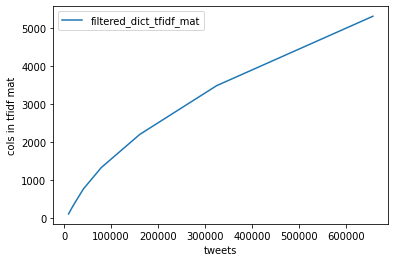

In [4]:
mes = 'filtered_dict_tfidf_mat'
plt.plot(measures[mes]['tweets'], measures[mes]['cols'], label=mes)
plt.legend()
plt.xlabel('tweets')
plt.ylabel('cols in tfidf mat')


Text(0, 0.5, 'bytes')

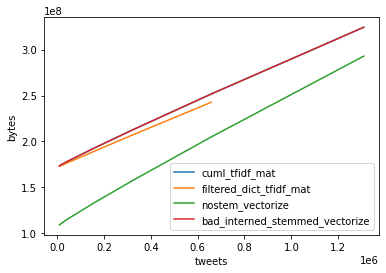

In [5]:
for mes in ['cuml_tfidf_mat', 'filtered_dict_tfidf_mat', 'nostem_vectorize', 'bad_interned_stemmed_vectorize']:#, 'gensim_tfidf_mat']:
    plt.plot(measures[mes]['tweets'], measures[mes]['mem'], label=mes)
plt.legend()
plt.xlabel('tweets')
plt.ylabel('bytes')

In [6]:
# for mes in ['']:
#     plt.plot(measures[mes]['tweets'], measures[mes]['cols'], label=mes)
# plt.legend()
# plt.xlabel('tweets')
# plt.ylabel('bytes')


In [7]:
# Vocabulary should not be increasing linearly! this is not what I was promised
# mem increases linearly in function of cols/tweets ... as if each tweet is adding at least one new, unique word not found in any other tweet: URLs!?
# what's gonna help: stemming, filter dictionary?
pow(2, 9)

512

In [19]:
rows = []
with open('../trained-2021-06-02/dictionary.txt') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        rows.append(row)
rows.pop(0)

['94862426']

In [20]:
vocab = [ row[1] for row in rows ]

In [21]:
len(vocab)

2001106

In [22]:
occs = [ int(row[-1]) for row in rows ]
len(occs)


2001106

(array([  36339., 1042056.,  777024.,  118716.,   20372.]),
 array([0.0e+00, 1.5e+00, 1.0e+01, 1.0e+02, 1.0e+03, 1.0e+04]),
 <BarContainer object of 5 artists>)

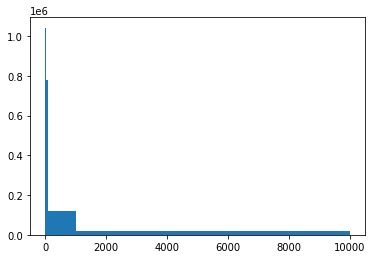

In [23]:
# plot = seaborn.histplot(occs)
# plt.hist(occs, bins=[10**i for i in range(8)])
plt.hist(occs, bins=[0, 1.5, 10, 100, 1000, 10000])

In [24]:
len([ occ for occ in occs if occ == 1 ])

36339

In [25]:
len([ occ for occ in occs if occ > 10 ])

886607

In [26]:
len([ occ for occ in occs if occ <= 10 ])


1114499

In [28]:
[ len([ occ for occ in occs if occ < i ])/len([ occ for occ in occs if occ >= i ]) for i in range(10) ]

[0.0,
 0.0,
 0.018495322855076456,
 0.310620176718043,
 0.4739993945210787,
 0.6432139924453933,
 0.7649845957905451,
 0.8824513278998186,
 0.982007376916037,
 1.0800523051912279]

In [46]:
rare_vocab = [ row[1] for row in rows if int(row[-1]) < 10]
len(rare_vocab)


1078395

In [64]:
mind_flood = rare_vocab[-1679:]